# Initializing and Importing Some of the Required Libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
df = pd.read_csv("./drive/My Drive/hw2_data/Real estate.csv")

# (a)

Checking for general info about the dataset and categorical attributes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Printing the shape of the dataset and the last five rows of it.

In [5]:
print("The shape of the dataset:", df.shape, end="\n\n")

df.tail(5)

The shape of the dataset: (414, 8)



,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


Dropping an unnecessary column, namely `No` column.

In [6]:
df.drop("No", axis=1, inplace=True)

Checking for missing values.

In [7]:
df.isna().sum().sort_values(ascending=False).to_frame(name="Missing Values %") / df.shape[0] * 100

,Missing Values %
Y house price of unit area,0.0
X6 longitude,0.0
X5 latitude,0.0
X4 number of convenience stores,0.0
X3 distance to the nearest MRT station,0.0
X2 house age,0.0
X1 transaction date,0.0


No missing values, so that's good.

Defining the predictor features as X and label as y.

In [8]:
y = df['Y house price of unit area']
X = df.drop('Y house price of unit area', axis=1)

Spliting the dataset to %70 train, %15 validation and %15 test sets.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=42)

# (b)

Importing the required ML models & metrics.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Getting the MSE scores for train and validation sets with the degree of the polynomial,&nbsp; $p=i$ $for$ $i=1,2,3,4,5$.

In [11]:
pVals = [1, 2, 3, 4, 5]

train_mse_list = []
val_mse_list = []

for p in pVals:

  poly_reg = PolynomialFeatures(degree=p)
  X_poly_train = poly_reg.fit_transform(X_train)

  lin_reg = LinearRegression()
  lin_reg.fit(X_poly_train, y_train)

  y_pred_train = lin_reg.predict(X_poly_train)

  train_mse = mean_squared_error(y_train, y_pred_train)
  train_mse_list.append(train_mse)

  X_poly_val = poly_reg.transform(X_val)
  y_pred_val = lin_reg.predict(X_poly_val)

  val_mse = mean_squared_error(y_val, y_pred_val)
  val_mse_list.append(val_mse)

Plotting the MSE of the train and validation sets by $p$. 

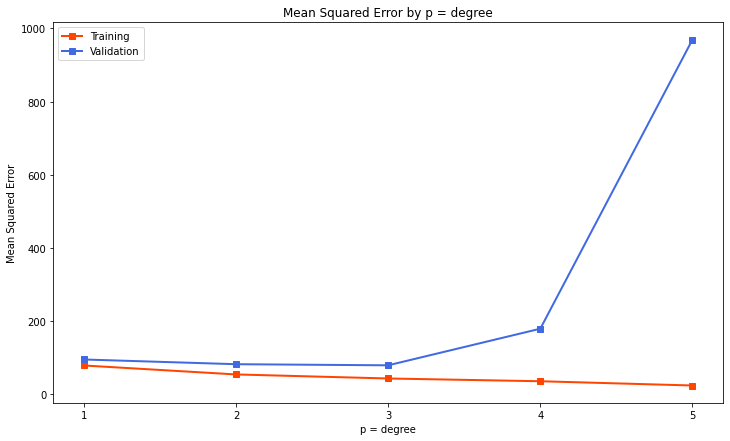

In [12]:
fig, ax = plt.subplots(figsize = (12, 7))

ax.set_title("Mean Squared Error by p = degree")
ax.set_xticklabels(pVals)
ax.set_xticks(np.arange(len(pVals)))
ax.set_xlabel("p = degree")
ax.set_ylabel("Mean Squared Error")

ax.plot(train_mse_list, label="Training", color="orangered", marker="s", ls="-", linewidth=2)
ax.plot(val_mse_list, label="Validation", color="royalblue", marker="s", ls="-", linewidth=2)

ax.legend(loc="upper left");

In [13]:
pVals[np.argmin(val_mse_list)]

3

The optimal value of $p$ is $3$ since $p = 3$ gives the lowest MSE on the validation set, and with $p > 3$ the model starts to (albeit slowly) overfit.

# (c)

Printing the covariance matrix of the dataset. (Excluding the test set, I think it leads to data leak if I include the whole dataset but I am not sure.)

In [14]:
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
cov_matrix = pd.concat([train, val], axis=0).cov()
cov_matrix

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,0.079071,0.036114,2.142303e+01,-0.004480,0.000116,-0.000131,0.347696
X2 house age,0.036114,131.809631,7.207629e+02,0.853795,0.006539,-0.012972,-34.850849
X3 distance to the nearest MRT station,21.423034,720.762873,1.551277e+06,-2202.374568,-8.949338,-15.420403,-11302.628666
X4 number of convenience stores,-0.004480,0.853795,-2.202375e+03,8.668246,0.015911,0.020348,22.781142
X5 latitude,0.000116,0.006539,-8.949338e+00,0.015911,0.000157,0.000079,0.090796
X6 longitude,-0.000131,-0.012972,-1.542040e+01,0.020348,0.000079,0.000228,0.107671
Y house price of unit area,0.347696,-34.850849,-1.130263e+04,22.781142,0.090796,0.107671,188.406879


Focusing on $Cov(X_i, Y)$ to see if there are any irrelevant features.

In [15]:
cov_matrix["Y house price of unit area"].sort_values(ascending=False).to_frame()

,Y house price of unit area
Y house price of unit area,188.406879
X4 number of convenience stores,22.781142
X1 transaction date,0.347696
X6 longitude,0.107671
X5 latitude,0.090796
X2 house age,-34.850849
X3 distance to the nearest MRT station,-11302.628666


Features that have $Cov(X_i, Y)$ close to 0 are the features that are going to be dropped because they seem to be irrelevant features.

In [16]:
# Features that are going to be dropped are sorted according to how close to 0 their covariance with label y
featuresToBeDropped = ["X5 latitude", "X6 longitude", "X1 transaction date"]

Getting the MSE scores for train and validation sets with the degree of the polynomial,&nbsp; $d=i$ $for$ $i=0,1,2,3$ with $p$ set to $3$.

In [17]:
dVals = [0, 1, 2, 3]

train_mse_list_c = []
val_mse_list_c = []

for d in dVals:

  print(f"d: {d}", end=" ")

  if d != 0:
    print(f"and dropped features: {featuresToBeDropped[0:d]}")

  else: 
    print("and no features are dropped")
  
  poly_reg = PolynomialFeatures(degree=3)
  X_poly_train = poly_reg.fit_transform(X_train.drop(featuresToBeDropped[0:d], axis=1))

  lin_reg = LinearRegression()
  lin_reg.fit(X_poly_train, y_train)

  y_pred_train = lin_reg.predict(X_poly_train)

  train_mse = mean_squared_error(y_train, y_pred_train)
  train_mse_list_c.append(train_mse)

  X_poly_val = poly_reg.transform(X_val.drop(featuresToBeDropped[0:d], axis=1))
  y_pred_val = lin_reg.predict(X_poly_val)

  val_mse = mean_squared_error(y_val, y_pred_val)
  val_mse_list_c.append(val_mse)

d: 0 and no features are dropped
d: 1 and dropped features: ['X5 latitude']
d: 2 and dropped features: ['X5 latitude', 'X6 longitude']
d: 3 and dropped features: ['X5 latitude', 'X6 longitude', 'X1 transaction date']


Plotting the MSE of the train and validation sets by $d$.

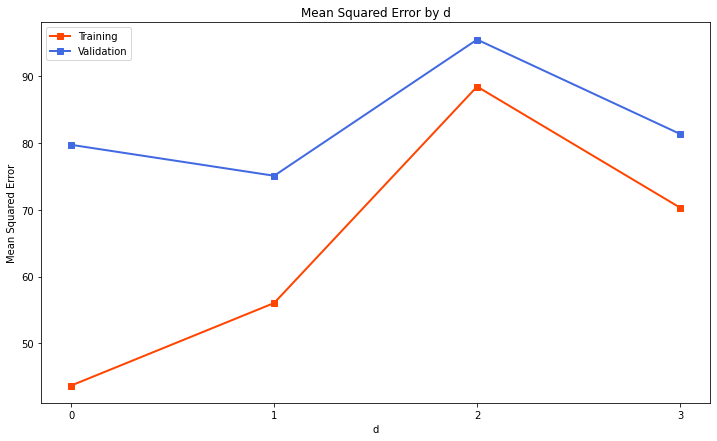

In [18]:
fig, ax = plt.subplots(figsize = (12, 7))

ax.set_title("Mean Squared Error by d")
ax.set_xticklabels(dVals)
ax.set_xticks(np.arange(len(dVals)))
ax.set_xlabel("d")
ax.set_ylabel("Mean Squared Error")

ax.plot(train_mse_list_c, label="Training", color="orangered", marker="s", ls="-", linewidth=2)
ax.plot(val_mse_list_c, label="Validation", color="royalblue", marker="s", ls="-", linewidth=2)

ax.legend(loc="upper left");

In [19]:
dVals[np.argmin(val_mse_list_c)]

1

The optimal value of $d$ is $1$ since $d = 1$ gives the lowest MSE on the validation set. The feature that was dropped by setting $d = 1$ is `X5 latitude`.

In [20]:
print(f"The lowest MSE on validation data is {min(val_mse_list_c):.2f}")

The lowest MSE on validation data is 75.07


# Report

**Problem Definition:** 

In this homework, our task was to implement a Simple Regression and Polynomial Regression models and find the best hyperparameters to predict real estate prices using the `Real estate.csv` dataset from Kaggle.

**For preprocessing:** 

Printed out the shape of the dataset, dropped the `No` column as it was an index column, irrelevant to the label we are trying to predict, and checked for missing values to be filled or instances to drop if they contained a lot of missing values. Since there were no missing values, no instances were dropped.
Also checked for categorical attributes, but thankfully all attributes were numerical so there was no need for one-hot-encoding.

**Train/val/test sets, size and how split:** 

Split the training data to 70% training, 15% validation, and 15% test. Used the validation data and the MSE obtained with validation data to determine the (arguably) best values for hyperparameters $p$ and $d$. 

$d$ was found by assuming that **if** $Cov(X_i,Y)$ ~ $0$, then the feature $X_i$ can be considered as an irrelevant feature.

**Test results, best hyperparameters, classification accuracy scores:**

We have obtained the best results with the Polynomial Regression model (`hyperparameters=(degree=3)`) with $p = 3$ and $d = 1$, giving MSE = $75.07$ on validation set.

**Comments:**

I was expecting $d=3$ to have the least MSE, as I would be dropping 3 irrelevant features, thus I was kinda surprised.